# Extraction and Visualisation of Key Phrases

Date of speech: 2020-02-08 00:00:00



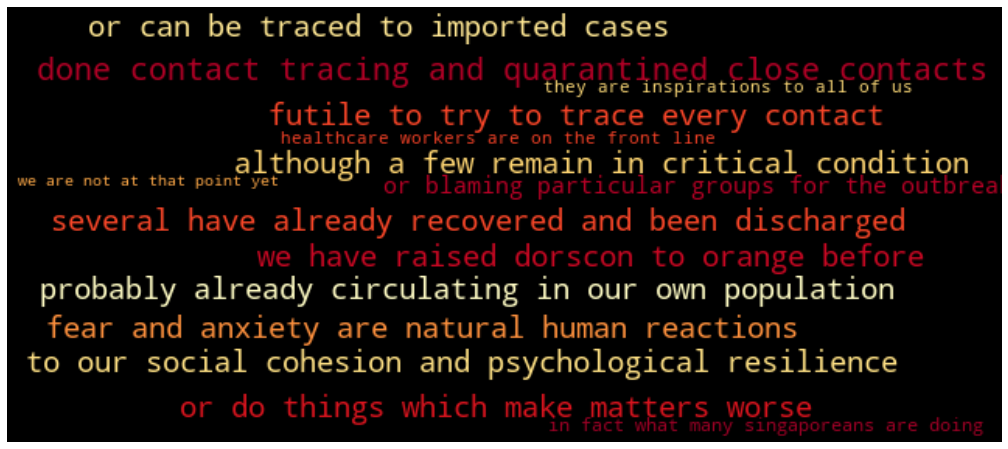

Date of speech: 2020-03-12 00:00:00



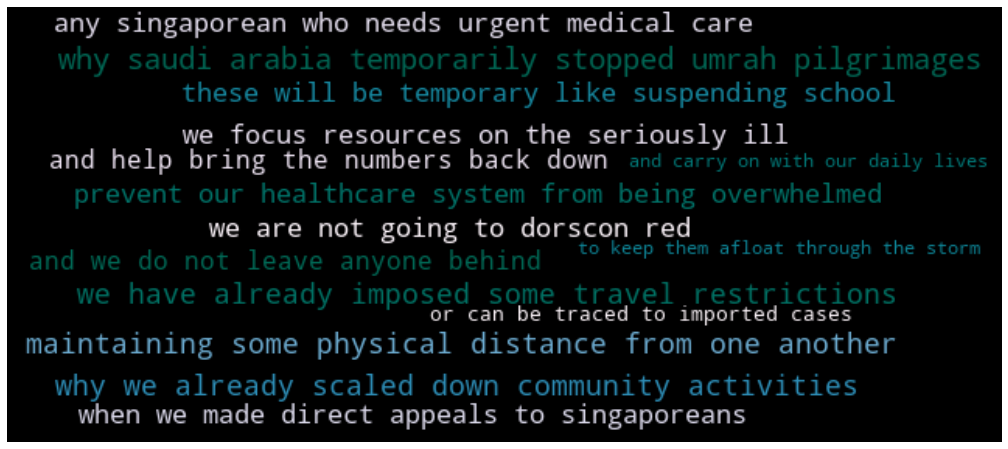

Date of speech: 2020-04-03 00:00:00



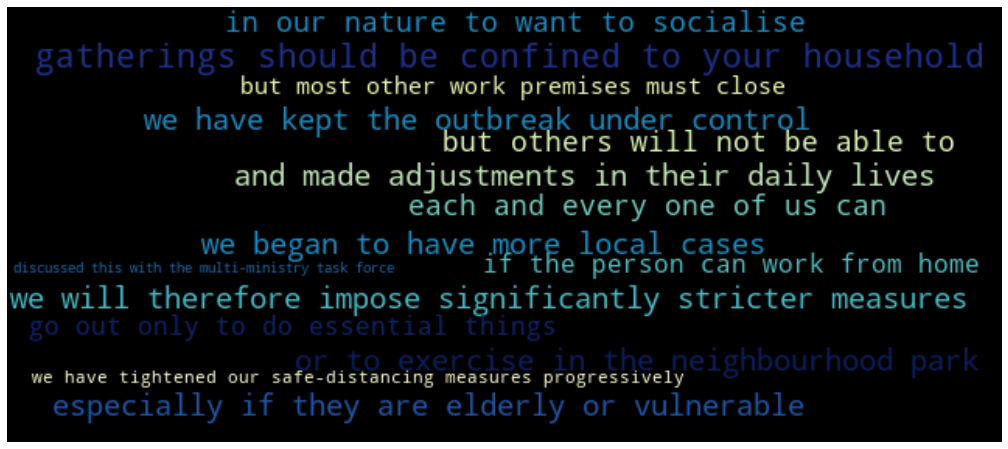

Date of speech: 2020-04-10 00:00:00



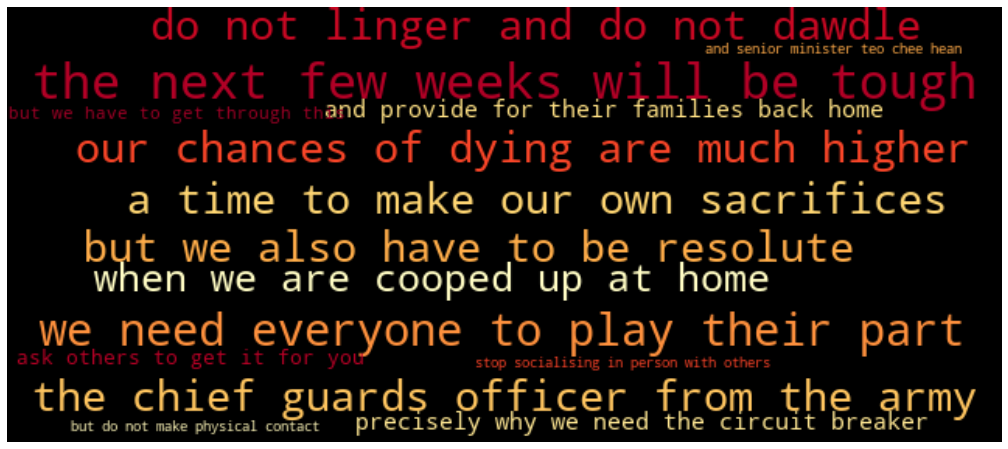

Date of speech: 2020-04-21 00:00:00



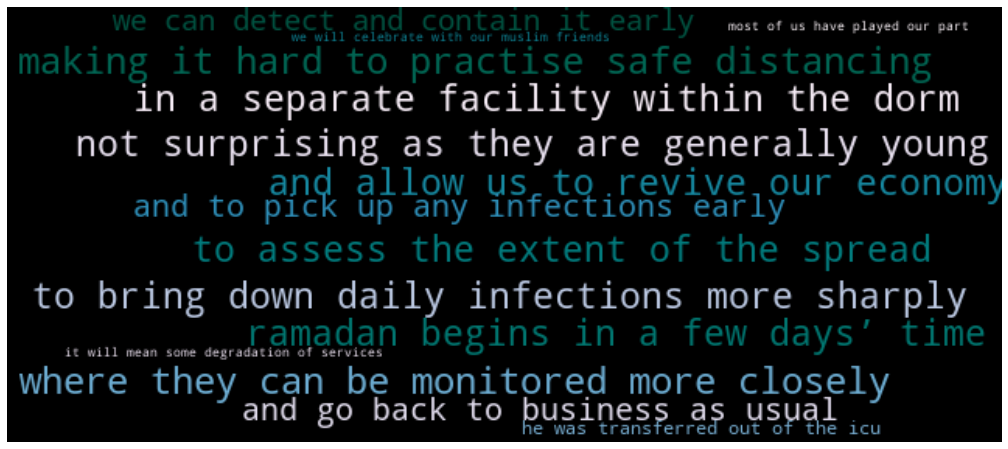

Date of speech: 2020-06-07 00:00:00



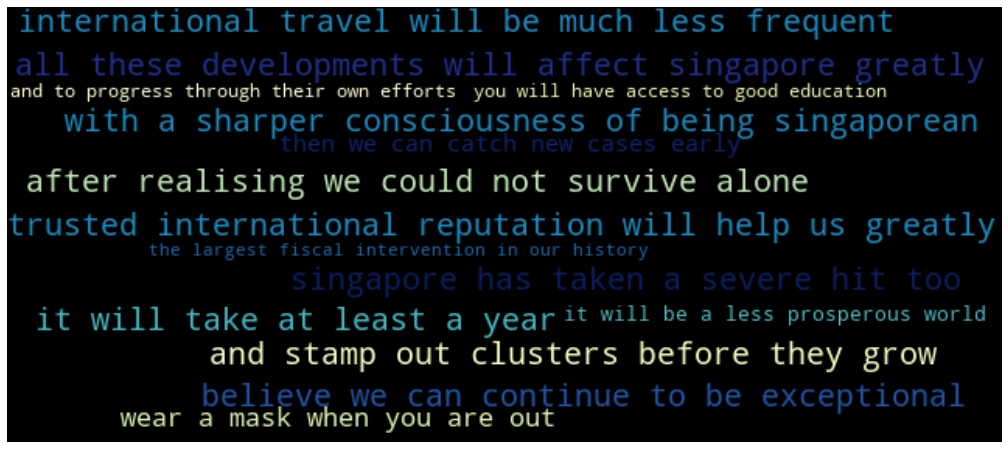

Date of speech: 2020-12-14 00:00:00



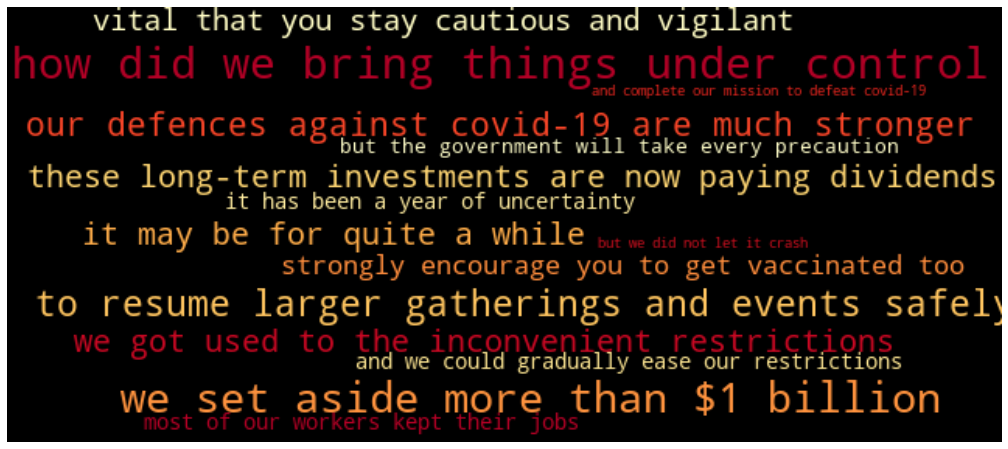

Date of speech: 2021-05-31 00:00:00



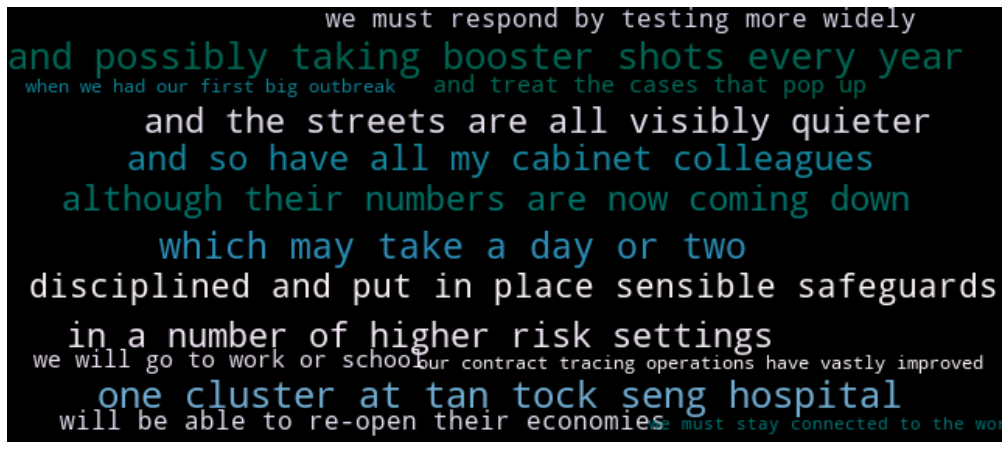

Date of speech: 2021-10-09 00:00:00



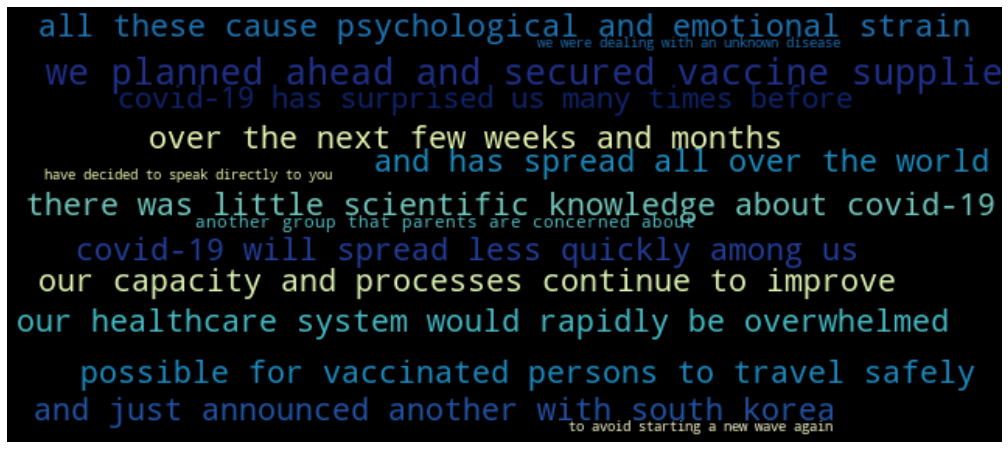

Date of speech: 2022-03-24 00:00:00



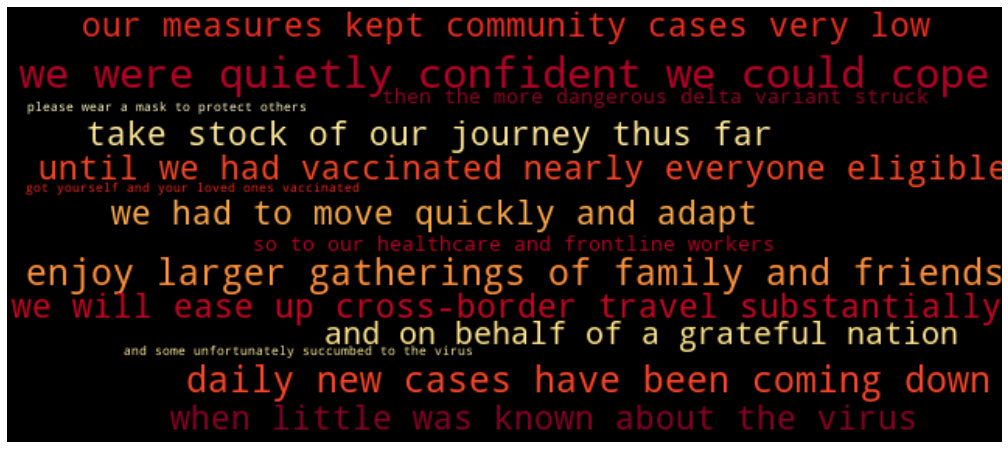

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from multi_rake import Rake
from wordcloud import WordCloud

def extract_key_phrases(data, top_n=10):
    
    colormap_list = ['YlOrRd', 'PuBuGn', 'YlGnBu', 'YlOrRd', 'PuBuGn', 'YlGnBu', 'YlOrRd', 'PuBuGn', 'YlGnBu', 'YlOrRd']
    
    for row in data.itertuples():
        speech = row.speech
        date = row.date
        print(f"Date of speech: {date}\n")

        # Apply RAKE to extract keywords
        rake = Rake(max_words=7, stopwords='english')
        top_keyphrases = rake.apply(speech)[:top_n]
        
        # Visualise key phrases with `word_cloud` package
        wc = WordCloud(width=800, 
                       height=350, 
                       prefer_horizontal=1, 
                       relative_scaling=1, 
                       scale=0.8,
                       colormap=colormap_list[row.Index], 
                       max_font_size=80, 
                       min_font_size=10, 
                       background_color='black', 
                       random_state=999)
        wc.generate_from_frequencies({i:k for i, k in top_keyphrases})
        plt.figure(figsize=(18, 8))
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.show()
        
        # Save phrase cloud as a .png file
        filename = "../Images/phrasecloud_" + str(date).split()[0] + ".png"
        wc.to_file(filename)
        
if __name__ == "__main__":
    
    # Load dataset
    df = pd.read_csv('../Data/pm_lee_covid_speeches.csv')
    
    # Extract date from title
    df['date'] = df['title'].str.extract(r'(\d{1,2}\s\w+\s202[0-2])')
    df['date'] = pd.to_datetime(df['date'])
    
    # Extract top 15 key phrases and visualise them
    extract_key_phrases(df, top_n=15)